In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


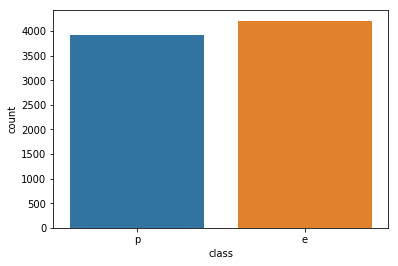

In [3]:
sns.countplot(x='class',data=df)
plt.show()

In [4]:
lb_class = LabelEncoder()
df['class_code'] = lb_class.fit_transform(df['class'])
df[['class','class_code']].head()

,class,class_code
0,p,1
1,e,0
2,e,0
3,p,1
4,e,0


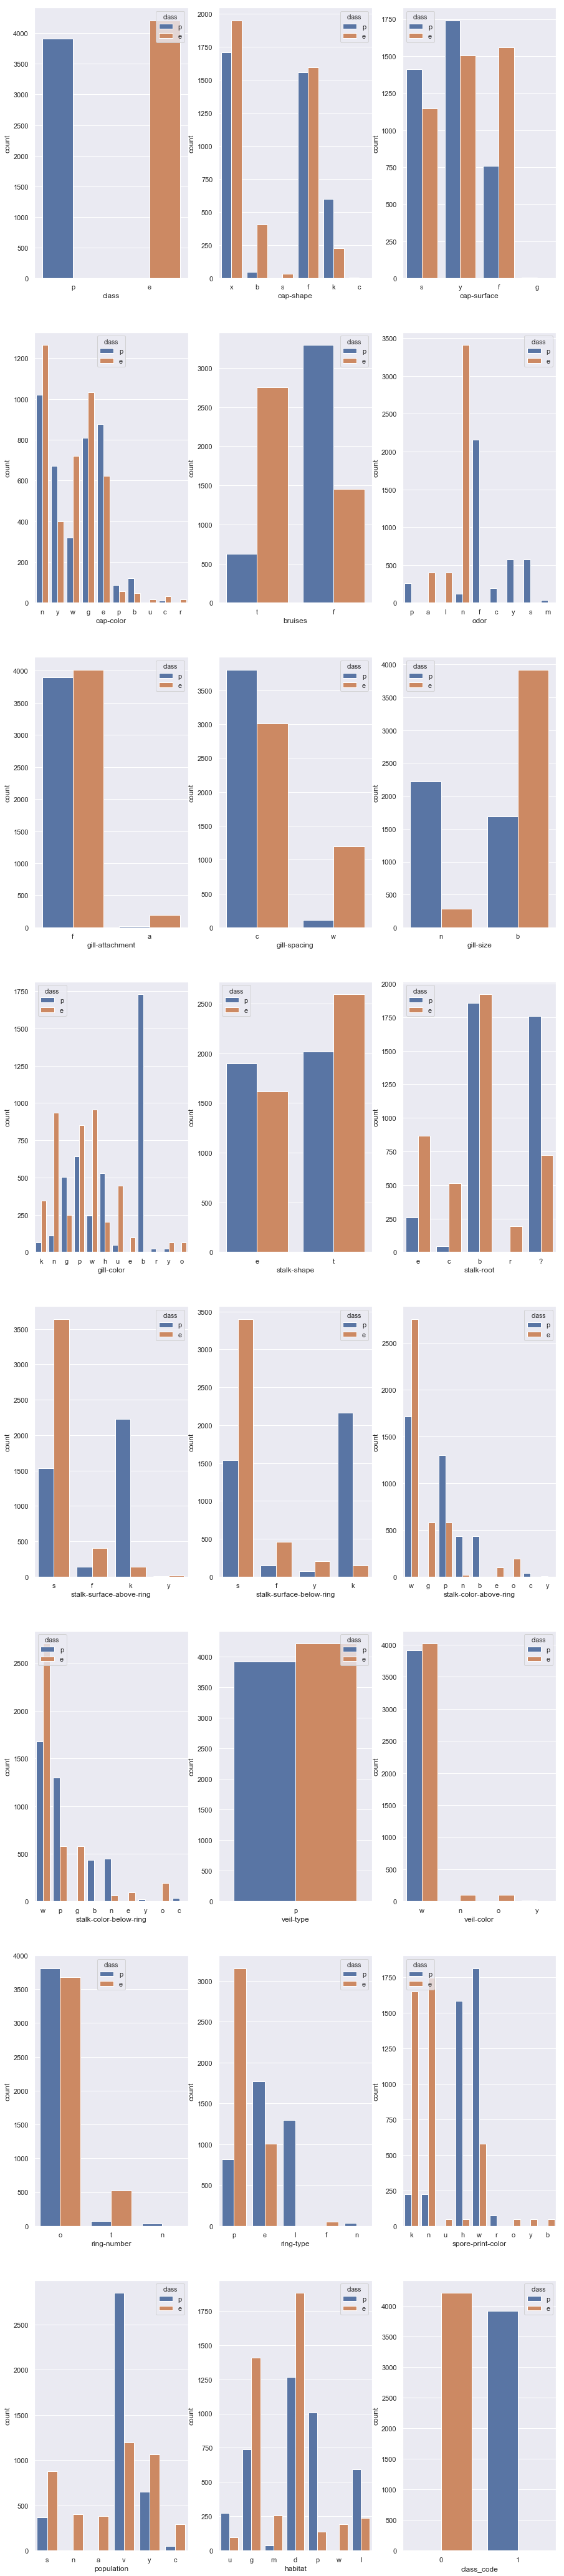

In [5]:
sns.set(style='darkgrid')
fig,axs = plt.subplots(nrows=8,ncols=3,figsize=(15,75))

i,j,k=0,0,0

for col in df.columns:
    i = int(k/3)
    j=k%3
    axe = sns.countplot(x=col,hue='class',data=df,ax=axs[i][j])
    
    bars = axe.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    
    for left,right in zip(left_bars, right_bars):
        height_l = np.nan_to_num(left.get_height())
        height_r = np.nan_to_num(right.get_height())
        total = height_l + height_r
        
    k = k+1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
cat_cols = df.columns.drop(['class','class_code'])
df = pd.get_dummies(df,columns=cat_cols)
df.head()

,class,class_code,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,e,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,p,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
x = df.drop(['class','class_code'],axis=1)
y = df['class']

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=15)

In [10]:
from sklearn.tree import DecisionTreeClassifier

Accuracy Score:  100.00


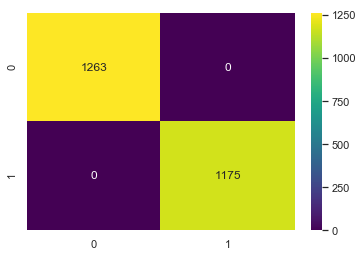

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

RF_model = RandomForestClassifier(n_estimators=10)
RF_model.fit(xtrain,ytrain)
RF_ypred = RF_model.predict(xtest)

accuracy = accuracy_score(ytest,RF_ypred)*100
print('Accuracy Score: ','{0:.2f}'.format(accuracy))
sns.heatmap(DataFrame(confusion_matrix(ytest,RF_ypred)), annot=True, fmt='g', cmap='viridis')
plt.show()

In [12]:
RF_ypred

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype=object)